In [1]:
# here after collecting the data create the code for implementing the model

In [1]:
import numpy as np
import os
import tensorflow as tf
import tqdm
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [7]:
data_dir='../temp'
no_of_videos=150
no_of_frames=30

In [3]:
os.listdir(data_dir)

['afternoon',
 'blank',
 'evening',
 'fine',
 'hello',
 'how are you',
 'morning',
 'name',
 'sorry',
 'thank you',
 'welcome']

In [4]:
actions=os.listdir(data_dir)
action_map={action:num for num,action in enumerate(actions)}

In [5]:
action_map

{'afternoon': 0,
 'blank': 1,
 'evening': 2,
 'fine': 3,
 'hello': 4,
 'how are you': 5,
 'morning': 6,
 'name': 7,
 'sorry': 8,
 'thank you': 9,
 'welcome': 10}

In [10]:
to_save_dir='../new_data'

In [20]:
for i in actions:
    os.mkdir(os.path.join(to_save_dir,i))

In [22]:
# x_data=[]
# y_data=[]
for action in tqdm.tqdm(actions):
    index=action_map[action]
    no_of_videos=len(os.listdir(os.path.join(data_dir,action)))
    for video in range(no_of_videos):
        window=[]
        for frame in range(no_of_frames):
            path=os.path.join(data_dir,action,str(video),f'{frame}.npy')
            res=np.load(path)
            array=res[:133].tolist()+res[1537:].tolist()
            window.append(array)
            
        to_save_array=np.array(window)
        path=os.path.join(to_save_dir,action,f'{video}.npy')
        np.save(path,to_save_array)
        
        # x_data.append(window)
        # y_data.append(index)
            

            
            
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [13:06<00:00, 71.51s/it]


In [17]:
np.load(os.path.join(to_save_dir,'afternoon','0.npy')).shape

(30, 258)

In [52]:
len(x_data),len(y_data),17*150

(2550, 2550, 2550)

In [46]:
x=np.array(x_data)

In [47]:
y=keras.utils.to_categorical(np.array(y_data)).astype(int)

In [48]:
y.shape,x.shape

((2550, 17), (2550, 30, 1662))

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [50]:
x_train.shape,y_train.shape

((2295, 30, 1662), (2295, 17))

In [53]:
x_test.shape

(255, 30, 1662)

In [26]:
from keras.callbacks import ModelCheckpoint

In [54]:
filepath = 'my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [28]:
del model

NameError: name 'model' is not defined

In [56]:
model=keras.models.Sequential()
model.add(keras.layers.GRU(64,activation='relu',return_sequences=True,input_shape=(30,1662)))
model.add(keras.layers.GRU(128,activation='relu',return_sequences=True))
model.add(keras.layers.GRU(32,activation='relu',return_sequences=False))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(17,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [57]:
history=model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test),callbacks=callbacks)

Epoch 1/200
72/72 [==============================] - ETA: 0s - loss: 2.4357 - categorical_accuracy: 0.1743
Epoch 1: val_loss improved from inf to 1.46032, saving model to my_best_model.hdf5


C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


72/72 [==============================] - 78s 290ms/step - loss: 2.4357 - categorical_accuracy: 0.1743 - val_loss: 1.4603 - val_categorical_accuracy: 0.3608
Epoch 2/200
72/72 [==============================] - ETA: 0s - loss: 1.1758 - categorical_accuracy: 0.5146
Epoch 2: val_loss improved from 1.46032 to 0.91489, saving model to my_best_model.hdf5
72/72 [==============================] - 13s 182ms/step - loss: 1.1758 - categorical_accuracy: 0.5146 - val_loss: 0.9149 - val_categorical_accuracy: 0.5961
Epoch 3/200
72/72 [==============================] - ETA: 0s - loss: 0.8497 - categorical_accuracy: 0.6235
Epoch 3: val_loss improved from 0.91489 to 0.64162, saving model to my_best_model.hdf5
72/72 [==============================] - 10s 139ms/step - loss: 0.8497 - categorical_accuracy: 0.6235 - val_loss: 0.6416 - val_categorical_accuracy: 0.7137
Epoch 4/200
72/72 [==============================] - ETA: 0s - loss: 0.7499 - categorical_accuracy: 0.6662
Epoch 4: val_loss improved from 0.641

In [24]:
history2=model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
85/85 [==============================] - 15s 121ms/step - loss: 0.1260 - categorical_accuracy: 0.9311 - val_loss: 0.2659 - val_categorical_accuracy: 0.8967
Epoch 2/30
85/85 [==============================] - 9s 111ms/step - loss: 0.1424 - categorical_accuracy: 0.9274 - val_loss: 0.4426 - val_categorical_accuracy: 0.8633
Epoch 3/30
85/85 [==============================] - 10s 117ms/step - loss: 0.1325 - categorical_accuracy: 0.9304 - val_loss: 0.3474 - val_categorical_accuracy: 0.8633
Epoch 4/30
85/85 [==============================] - 10s 117ms/step - loss: 0.1414 - categorical_accuracy: 0.9267 - val_loss: 0.2421 - val_categorical_accuracy: 0.9167
Epoch 5/30
85/85 [==============================] - 10s 117ms/step - loss: 0.1327 - categorical_accuracy: 0.9330 - val_loss: 0.2777 - val_categorical_accuracy: 0.8833
Epoch 6/30
85/85 [==============================] - 10s 117ms/step - loss: 0.1460 - categorical_accuracy: 0.9241 - val_loss: 0.2294 - val_categorical_accuracy: 0.9167

KeyboardInterrupt: 

In [20]:

model.evaluate(x_test,y_test)

17/17 [==============================] - 1s 30ms/step - loss: 0.0404 - categorical_accuracy: 0.9833


[0.04038967937231064, 0.9833333492279053]

In [64]:
model.evaluate(x_test,y_test)

8/8 [==============================] - 0s 41ms/step - loss: 0.1741 - categorical_accuracy: 0.9176


[0.174140065908432, 0.9176470637321472]

In [16]:
from matplotlib import pyplot as plt

In [17]:
plt.plot(history_2_v2.history['loss'])
plt.plot(history_2_v2.history['categorical_accuracy'])
plt.title('Training Stats')
plt.xlabel('epochs')
plt.legend(['training_loss','traning categorical_accuracy'])
plt.savefig('training_stats.png')

NameError: name 'history_2_v2' is not defined

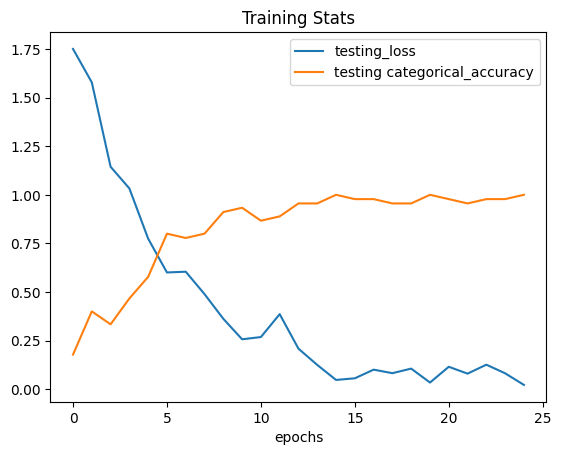

In [42]:
plt.plot(history_2_v2.history['val_loss'])
plt.plot(history_2_v2.history['val_categorical_accuracy'])
plt.title('Training Stats')
plt.xlabel('epochs')
plt.legend(['testing_loss','testing categorical_accuracy'])
plt.savefig('testing_stats.png')

In [18]:
gru_model2_v2.save('gru_isl_model_extra_v2.keras')
gru_model2_v2.save('gru_isl_model_extra_v2.h5')

C:\Users\vivek chouhan\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
import pickle

In [63]:
pickle.dump(actions,open('new_classes.pickle','wb'))

In [50]:
actual=[np.argmax(i) for i in y_test]

In [51]:
len(actual)

45

In [53]:
y_p=gru_model2_v2.predict(x_test)

2/2 [==============================] - 1s 30ms/step


In [54]:
y_p

array([[4.0991516e-11, 1.5915861e-06, 1.7602229e-05, 2.9272464e-04,
        3.4122996e-02, 9.6556503e-01],
       [2.1456553e-10, 9.6570851e-08, 2.1201344e-04, 8.6935339e-03,
        3.4385999e-03, 9.8765570e-01],
       [9.9828440e-01, 1.3990568e-03, 1.9528099e-07, 2.6365076e-04,
        9.8078626e-06, 4.2761432e-05],
       [1.5491990e-10, 1.1384355e-07, 9.9908757e-01, 6.9884126e-10,
        8.6657028e-04, 4.5797864e-05],
       [8.0207320e-15, 1.3361032e-11, 2.1496926e-06, 3.4936625e-07,
        2.9814078e-03, 9.9701607e-01],
       [3.3969862e-09, 1.8448958e-05, 1.1921901e-03, 2.7535358e-05,
        8.7938541e-01, 1.1937642e-01],
       [2.3373993e-15, 7.6752504e-13, 1.5847012e-07, 5.9118061e-06,
        2.2797358e-05, 9.9997115e-01],
       [1.0250419e-08, 4.1355665e-06, 9.7584730e-01, 1.6533741e-08,
        2.3974326e-02, 1.7417989e-04],
       [6.2335333e-05, 9.9906415e-01, 3.0153806e-05, 4.6705865e-04,
        2.9726129e-04, 7.8963087e-05],
       [3.9946135e-10, 1.2318050e-07,

In [56]:
predicted=[np.argmax(i) for i in y_p]

In [57]:
from seaborn import heatmap

In [59]:
cm=tf.math.confusion_matrix(actual,predicted)

In [60]:
from sklearn.metrics import classification_report

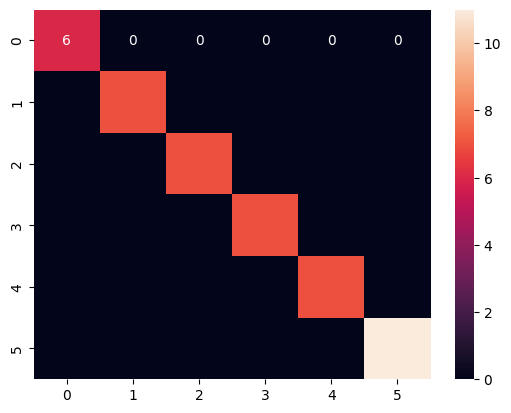

In [64]:
cm_plot=heatmap(cm,annot=True)

In [67]:
cm_plot.get_figure().savefig('v2_cm.png')

In [68]:
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [58]:
model_new=keras.models.load_model('my_best_model.hdf5')

In [61]:
model_new.save('new_model.keras')